In [1]:
import os
import glob

import pandas as pd
import numpy as np
import rasterio as rio

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from scipy import stats
#import statannotations
from statannot import add_stat_annotation


# PlanetScope VI Boxplots 
## PRI 

In [2]:
def img_to_df(img_path, cols):
    with rio.open(img_path) as src:
        as_array = src.read()
        band_arrs = []
        
        for i in np.arange(src.count):
            band_arr = as_array[i].flatten()
            band_arr = band_arr/10000
            
            band_arrs.append(band_arr)
        
        df = pd.DataFrame(band_arrs,cols).T
        df['Date'] = img_path.split('/')[-1].split('_')[0]
        
        # Optional: drops entries with no severity rating. Comment out if unnecessary.
        no_nans = df.dropna(subset=['total_dis_sev']) 
        
        return no_nans

In [3]:
def add_vis(df):
    df['pri']= (df['green']- df['greenI'])/(df['green']+df['greenI'])
#     df['clre'] = (df['nir']/df['rede'])-1
#     df['ndre'] = (df['nir'] - df['rede']) / (df['nir'] + df['rede'])
    df['tcari'] = 3 * (( (df['rede'] - df['red']) - 0.2 * (df['rede'] - df['green']) ) * (df['rede'] / df['red']))
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
#     df['sr']= df['nir']/df['red']
#     df['msr']= ((df['nir']/df['red'])-1)/(np.sqrt((df['nir']/df['red'])+1))
#     df['gri']=df['green']/df['red']
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
#     df['cblue_blue'] = (df['c_blue']-df['blue'])/(df['c_blue']+df['blue'])
#     df['greenI_cblue'] = (df['greenI']-df['c_blue'])/(df['c_blue']+df['greenI'])
#     df['green_cblue'] = (df['green']-df['c_blue'])/(df['c_blue']+df['green'])
#     df['yellow_cblue'] = (df['yellow']-df['c_blue'])/(df['c_blue']+df['yellow'])
#     df['cblue_red'] = (df['c_blue']-df['red'])/(df['c_blue']+df['red'])
#     df['rede_cblue'] = (df['rede']-df['c_blue'])/(df['c_blue']+df['rede'])
#     df['nir_cblue'] = (df['nir']-df['c_blue'])/(df['c_blue']+df['nir'])
#     df['greenI_blue'] = (df['greenI']-df['blue'])/(df['blue']+df['greenI'])
#     df['green_blue'] = (df['green']-df['blue'])/(df['blue']+df['green'])
#     df['yellow_blue'] = (df['yellow']-df['blue'])/(df['blue']+df['yellow'])
#     df['blue_red'] = (df['blue']-df['red'])/(df['blue']+df['red'])
#     df['rede_blue'] = (df['rede']-df['blue'])/(df['blue']+df['rede'])
#     df['nir_blue'] = (df['nir']-df['blue'])/(df['nir']+df['blue'])
#     df['greenI_yellow'] = (df['greenI']-df['yellow'])/(df['greenI']+df['yellow'])
#     df['greenI_red'] = (df['greenI']-df['red'])/(df['greenI']+df['red'])
#     df['rede_greenI'] = (df['rede']-df['greenI'])/(df['greenI']+df['rede'])
#     df['nir_greenI'] = (df['nir']-df['greenI'])/(df['greenI']+df['nir'])
#     df['green_yellow'] = (df['green']-df['yellow'])/(df['green']+df['yellow'])
    df['green_red'] = (df['green']-df['red'])/(df['green']+df['red'])
#     df['rede_green'] = (df['rede']-df['green'])/(df['green']+df['rede'])
#     df['nir_green'] = (df['nir']-df['green'])/(df['green']+df['nir'])
#     df['yellow_red'] = (df['yellow']-df['red'])/(df['yellow']+df['red'])
#     df['rede_yellow'] = (df['rede']-df['yellow'])/(df['yellow']+df['rede'])
#     df['nir_yellow'] = (df['nir']-df['yellow'])/(df['yellow']+df['nir'])
#     df['rede_red']= (df['rede']-df['red'])/(df['rede']+df['red'])


    
    return df

In [4]:
data_dir = '/Users/kathleenkanaley/Desktop/grapes_from_space/data/'
dis_ras_20 = glob.glob(data_dir +'images/2020/PScope/dis_band_*/*.tif')
dis_ras_21 = glob.glob(data_dir +'images/2021/PScope/dis_band_*/*.tif')
dis_ras_22 = glob.glob(data_dir +'images/2022/PScope/dis_band_*/*.tif')

In [5]:
cols = ['c_blue','blue','greenI', 'green', 'yellow', 'red', 'rede', 'nir','total_dis_sev','dm_sev', 'dm_inc']

# Get a dataframe for all 2020 images

dfs_2020 = [img_to_df(dis_ras_20[i], cols) for i in np.arange(len(dis_ras_20))]
df_2020 = pd.concat(dfs_2020)

df_2020['total_dis_sev'] = df_2020['total_dis_sev']*10000
df_2020['dm_sev'] = df_2020['dm_sev']*10000
df_2020['dm_inc'] = df_2020['dm_inc']*10000

df_2020['inc_class'] = 'low'
df_2020.loc[df_2020['dm_inc']>25,'inc_class']= 'high'
    
df_2020['severity_class'] = 'low'
df_2020.loc[df_2020['dm_sev']>10,'severity_class']= 'high'

vis_2020 = add_vis(df_2020)

vis_2020.columns

Index(['c_blue', 'blue', 'greenI', 'green', 'yellow', 'red', 'rede', 'nir',
       'total_dis_sev', 'dm_sev', 'dm_inc', 'Date', 'inc_class',
       'severity_class', 'pri', 'tcari', 'ndvi', 'evi', 'savi', 'arvi',
       'green_red'],
      dtype='object')

In [6]:
vis_2020.Date.unique()

array(['20200801', '20200713', '20200616'], dtype=object)

In [7]:
# Get df for 2021 and 2022

#2021

dfs_2021 = [img_to_df(dis_ras_21[i], cols) for i in np.arange(len(dis_ras_21))]
df_2021 = pd.concat(dfs_2021)

df_2021['total_dis_sev'] = df_2021['total_dis_sev']*10000
df_2021['dm_sev'] = df_2021['dm_sev']*10000
df_2021['dm_inc'] = df_2021['dm_inc']*10000

df_2021['inc_class'] = 'low'
df_2021.loc[df_2021['dm_inc']>25,'inc_class']= 'high'
    
df_2021['severity_class'] = 'low'
df_2021.loc[df_2021['dm_sev']>10,'severity_class']= 'high'

vis_2021 = add_vis(df_2021)
vis_2021 = vis_2021[vis_2021['Date']!='20210804']
#vis_2021.columns

dfs_2022 = [img_to_df(dis_ras_22[i], cols) for i in np.arange(len(dis_ras_22))]
df_2022 = pd.concat(dfs_2022)

df_2022['total_dis_sev'] = df_2022['total_dis_sev']*10000
df_2022['dm_sev'] = df_2022['dm_sev']*10000
df_2022['dm_inc'] = df_2022['dm_inc']*10000

df_2022['inc_class'] = 'low'
df_2022.loc[df_2022['dm_inc']>25,'inc_class']= 'high'
    
df_2022['severity_class'] = 'low'
df_2022.loc[df_2022['dm_sev']>10,'severity_class']= 'high'

vis_2022 = add_vis(df_2022)

print(vis_2022.Date.unique())
print(vis_2021.Date.unique())

['20220726' '20220801' '20220630' '20220704' '20220624']
['20210808' '20210726' '20210715']


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

20200801_low v.s. 20200801_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.397e-01 U_stat=2.804e+03


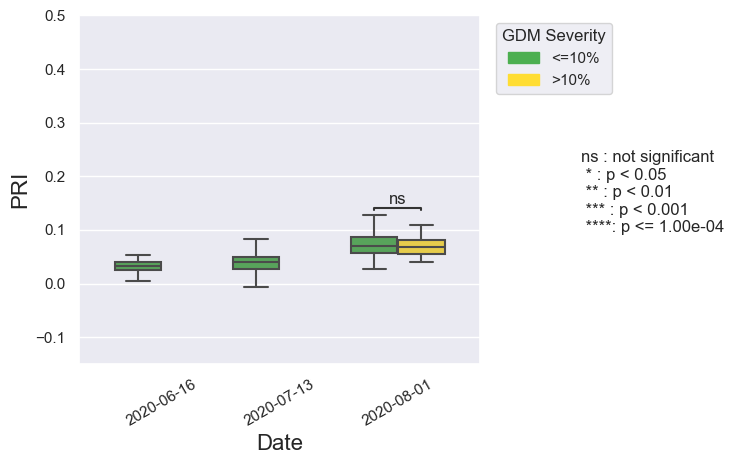

In [16]:
#2020 PRI - Sev
x = "Date"
y = "pri"
hue = "severity_class"
hue_order=['low', 'high']
order = ['20200616','20200713', '20200801']
pairs=[
#      ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
#     ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

sns.set_theme(style="darkgrid")
sns.set(font="Arial")
colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2020, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2020-06-16','2020-07-13', '2020-08-01'], 
                   rotation=30)
add_stat_annotation(ax, data=vis_2020, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("PRI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("PScope NDVI by Date 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_pscopeREGR_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

20200801_low v.s. 20200801_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.398e-07 U_stat=1.231e+04


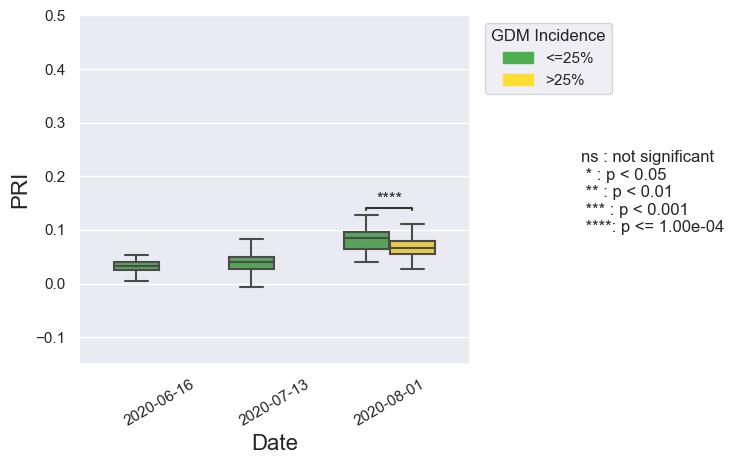

In [17]:
#2020 PRI - Inc
x = "Date"
y = "pri"
hue = "inc_class"
hue_order=['low', 'high']
order = ['20200616','20200713', '20200801']
pairs=[
#      ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
#     ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

sns.set_theme(style="darkgrid")
sns.set(font="Arial")
colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2020, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2020-06-16','2020-07-13', '2020-08-01'], 
                   rotation=30)
add_stat_annotation(ax, data=vis_2020, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("PRI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("PScope NDVI by Date 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_pscopeREGR_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

20210726_low v.s. 20210726_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.604e-01 U_stat=9.434e+03
20210808_low v.s. 20210808_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.590e-05 U_stat=1.597e+04


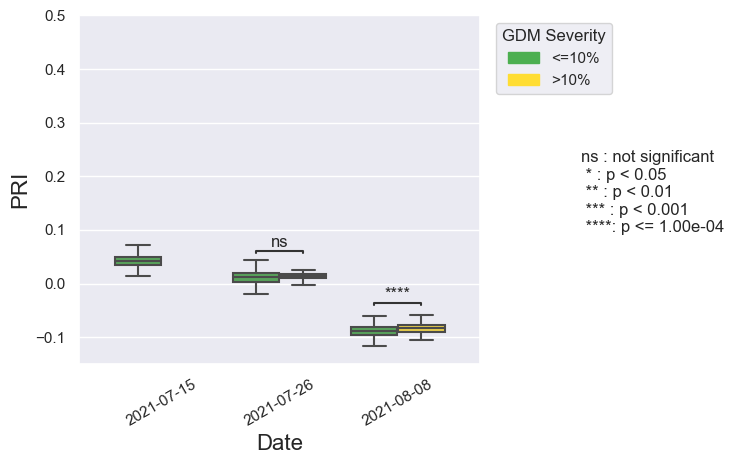

In [18]:
#2021 PRI - Sev
x = "Date"
y = "pri"
hue = "severity_class"
hue_order=['low', 'high']
order = ['20210715','20210726','20210808']
pairs=[
#        ((order[0], "high"), (order[0], "low")),
      ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
#     ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

sns.set_theme(style="darkgrid")
sns.set(font="Arial")
colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2021, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2021-07-15','2021-07-26','2021-08-08'], 
                   rotation=30)
add_stat_annotation(ax, data=vis_2021, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("PRI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("PScope NDVI by Date 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_pscopeREGR_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

20210726_low v.s. 20210726_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.283e-01 U_stat=2.136e+04
20210715_low v.s. 20210715_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.834e-01 U_stat=5.850e+01
20210808_low v.s. 20210808_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.613e-02 U_stat=3.013e+04


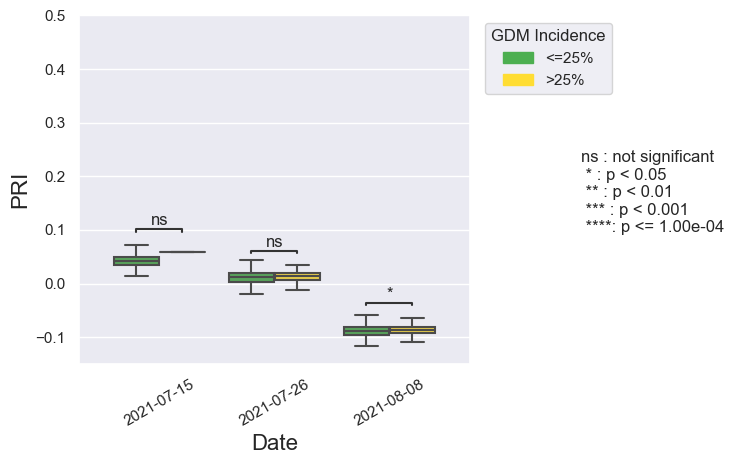

In [19]:
#2021 PRI - Inc
x = "Date"
y = "pri"
hue = "inc_class"
hue_order=['low', 'high']
order = ['20210715','20210726','20210808']
pairs=[
        ((order[0], "high"), (order[0], "low")),
      ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
#     ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

sns.set_theme(style="darkgrid")
sns.set(font="Arial")
colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2021, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2021-07-15','2021-07-26','2021-08-08'], 
                   rotation=30)
add_stat_annotation(ax, data=vis_2021, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("PRI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("PScope NDVI by Date 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_pscopeREGR_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

20220704_low v.s. 20220704_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.324e+03
20220726_low v.s. 20220726_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.409e-01 U_stat=4.644e+03
20220801_low v.s. 20220801_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.306e+04


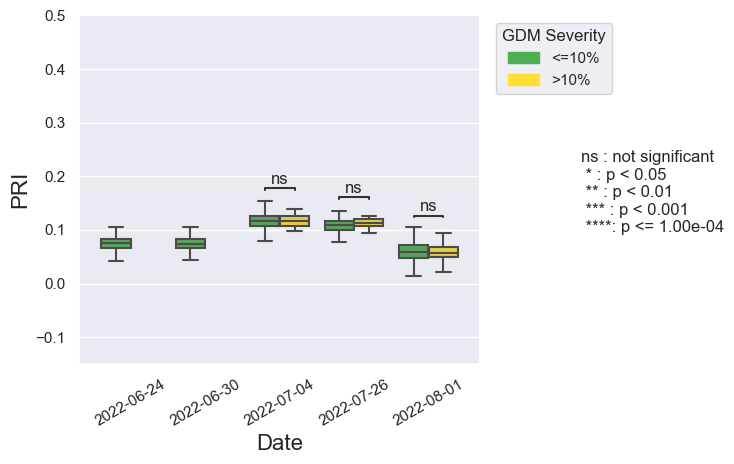

In [20]:
#2022 PRI - Sev
x = "Date"
y = "pri"
hue = "severity_class"
hue_order=['low', 'high']
order = ['20220624','20220630','20220704','20220726','20220801']
pairs=[
#      ((order[0], "high"), (order[0], "low")),
#      ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

sns.set_theme(style="darkgrid")
sns.set(font="Arial")
colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2022, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2022-06-24','2022-06-30','2022-07-04','2022-07-26','2022-08-01'], 
                   rotation=30)
add_stat_annotation(ax, data=vis_2022, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("PRI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("PScope NDVI by Date 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_pscopeREGR_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

20220630_low v.s. 20220630_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.720e+03
20220624_low v.s. 20220624_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.561e-01 U_stat=1.600e+03
20220704_low v.s. 20220704_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.102e+03
20220726_low v.s. 20220726_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.221e+04
20220801_low v.s. 20220801_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.032e+04


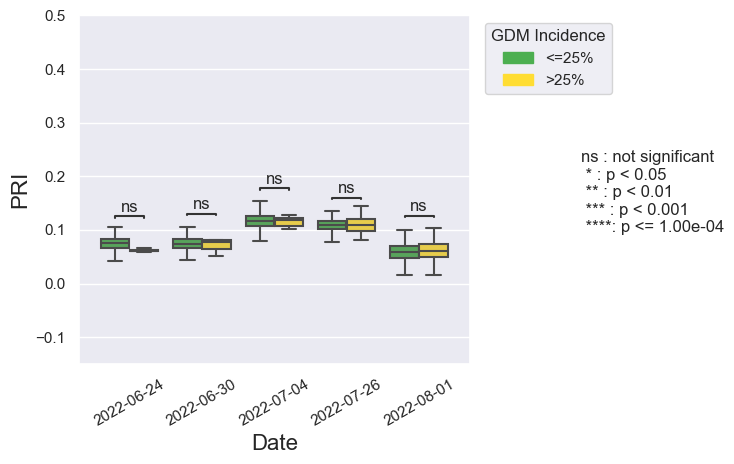

In [21]:
#2022 PRI - Inc
x = "Date"
y = "pri"
hue = "inc_class"
hue_order=['low', 'high']
order = ['20220624','20220630','20220704','20220726','20220801']
pairs=[
      ((order[0], "high"), (order[0], "low")),
      ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

sns.set_theme(style="darkgrid")
sns.set(font="Arial")
colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=vis_2022, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2022-06-24','2022-06-30','2022-07-04','2022-07-26','2022-08-01'], 
                   rotation=30)
add_stat_annotation(ax, data=vis_2022, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("PRI", fontsize= 16)

plt.ylim(-0.15, 0.5)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("PScope NDVI by Date 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("ICPP_pscopeREGR_2020.svg")